In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
print(df.shape[0])

1025


In [4]:
print(df.describe().T)


           count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323

In [5]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


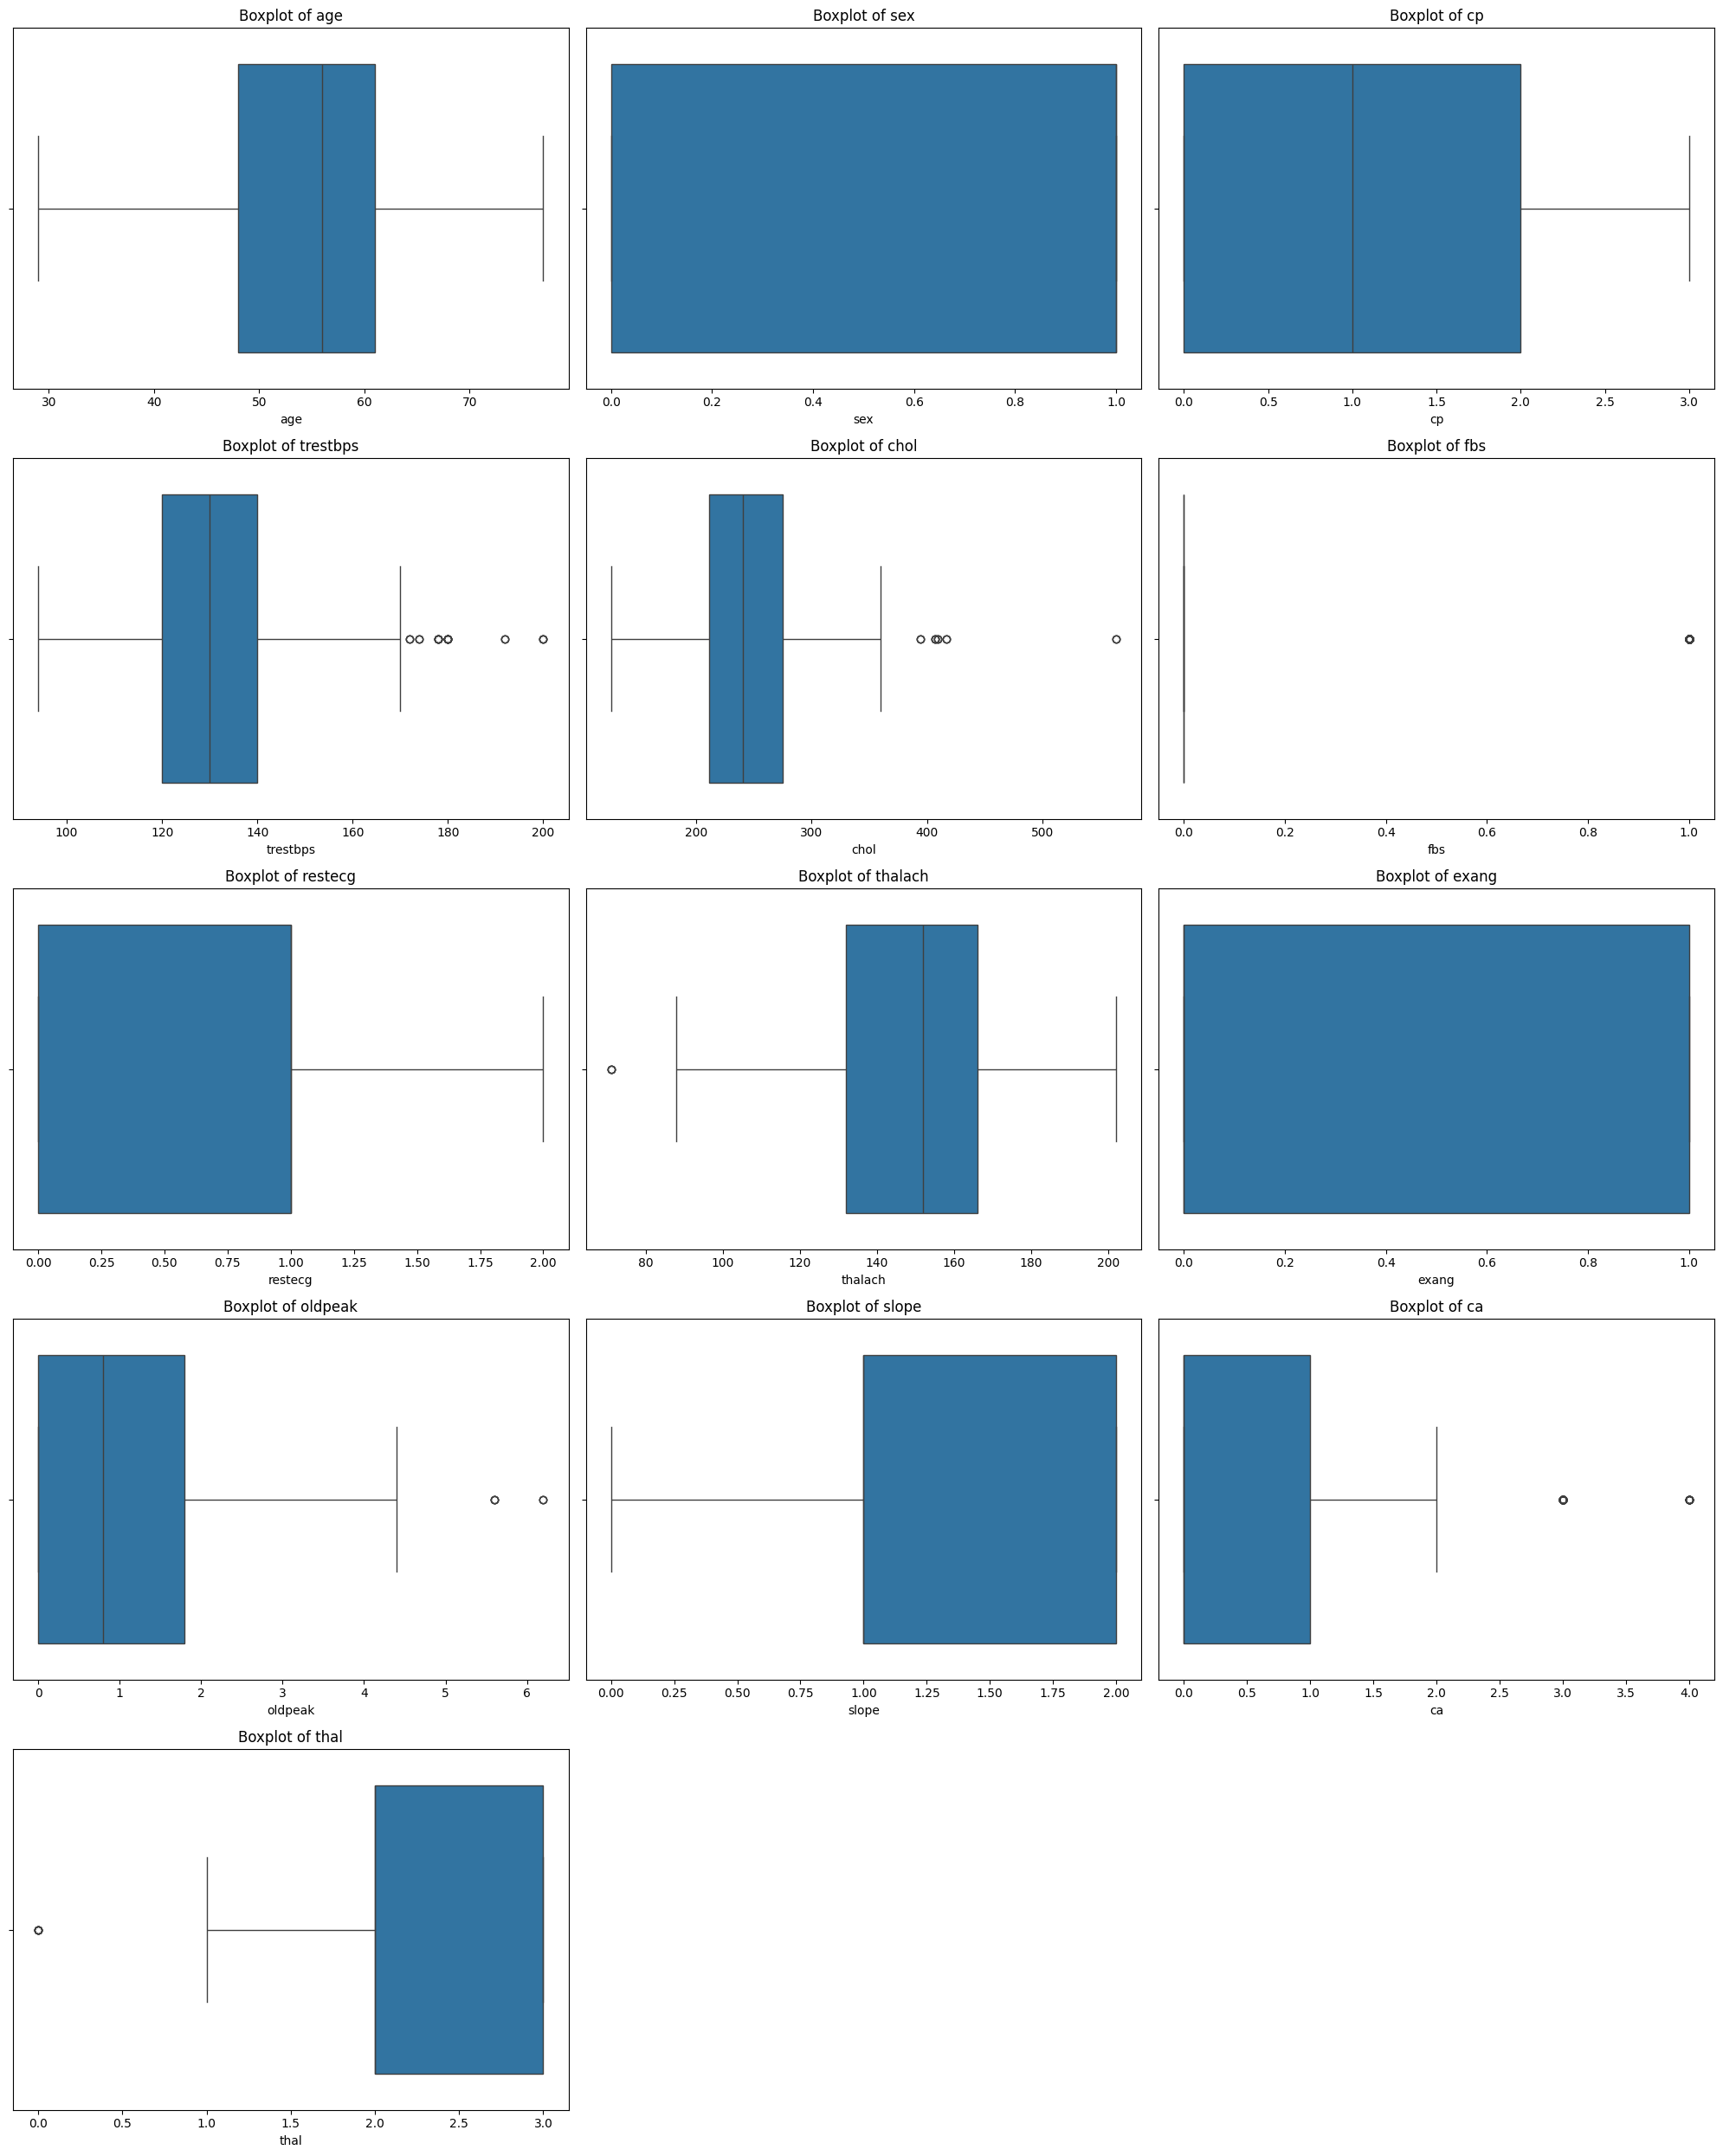

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


columns = df.columns[:-1]


num_cols = 3
num_rows = math.ceil(len(columns) / num_cols)


fig, axis = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axis = axis.flatten()


for i, var in enumerate(columns):
    sns.boxplot(data=df, x=var, ax=axis[i])
    axis[i].set_title(f'Boxplot of {var}')


for j in range(i + 1, len(axis)):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()

In [ ]:
print(df.std().T)
print(df.var().T)

age          9.072290
sex          0.460373
cp           1.029641
trestbps    17.516718
chol        51.592510
fbs          0.356527
restecg      0.527878
thalach     23.005724
exang        0.472772
oldpeak      1.175053
slope        0.617755
ca           1.030798
thal         0.620660
target       0.500070
dtype: float64
age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64


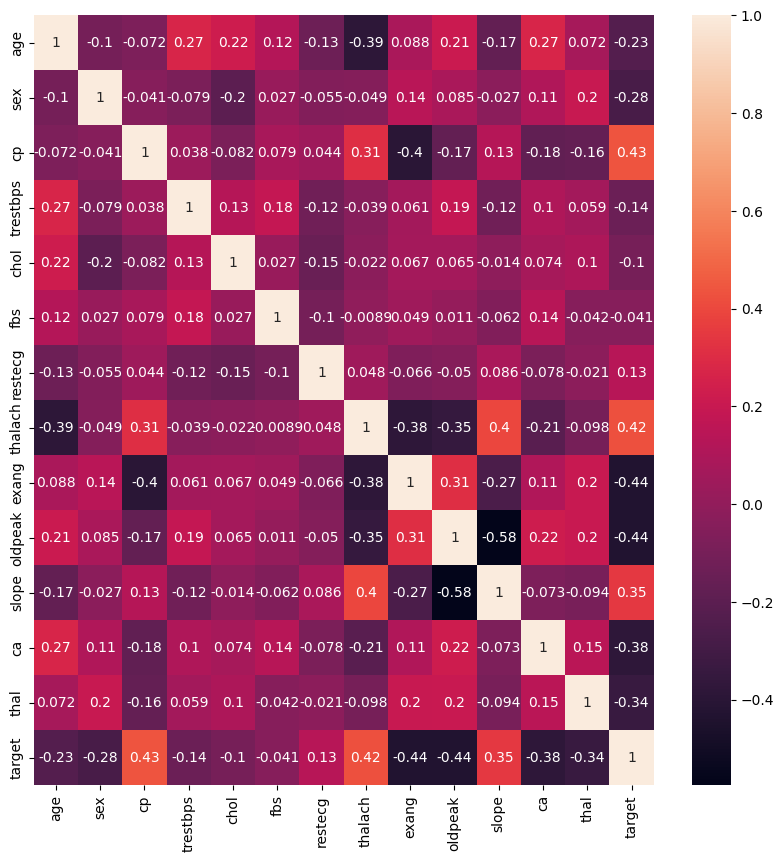

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

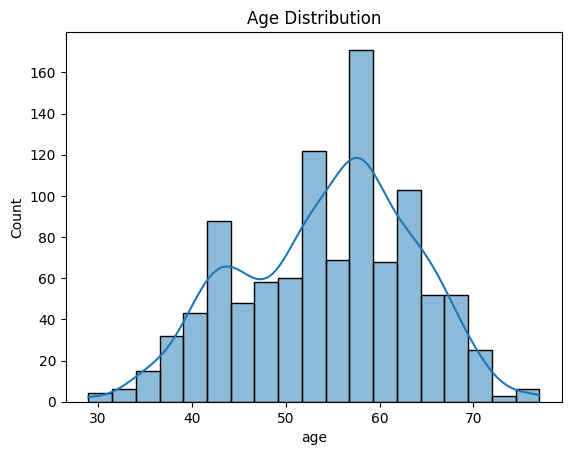

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

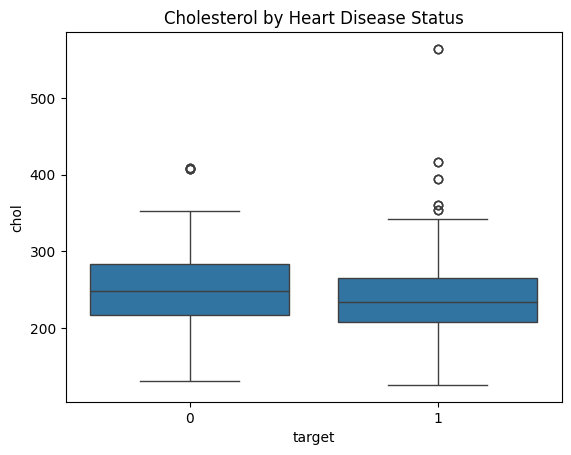

In [ ]:
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol by Heart Disease Status')
plt.show()


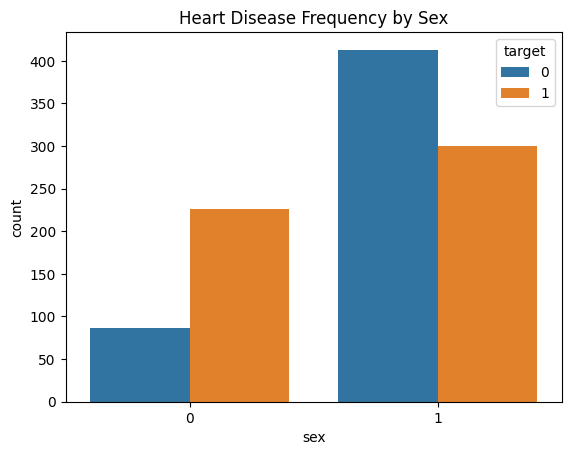

In [ ]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease Frequency by Sex')
plt.show()

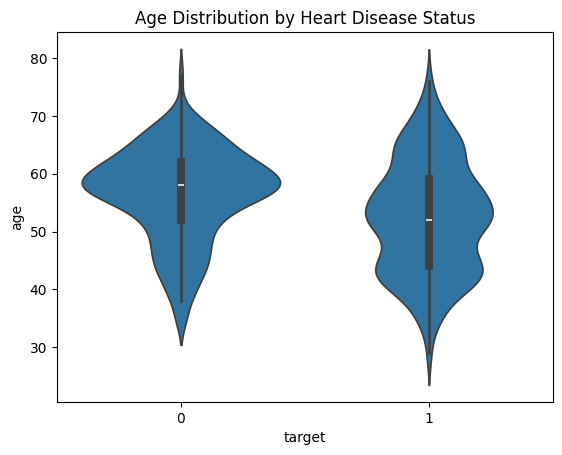

In [ ]:
sns.violinplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.show()


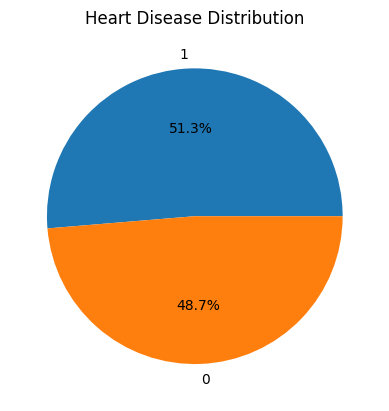

In [ ]:
df['target'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.7951219512195122
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:
 [[73 29]
 [13 90]]


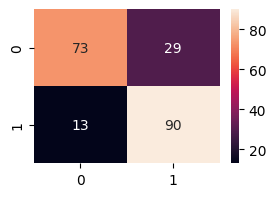

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot = True)
plt.show()


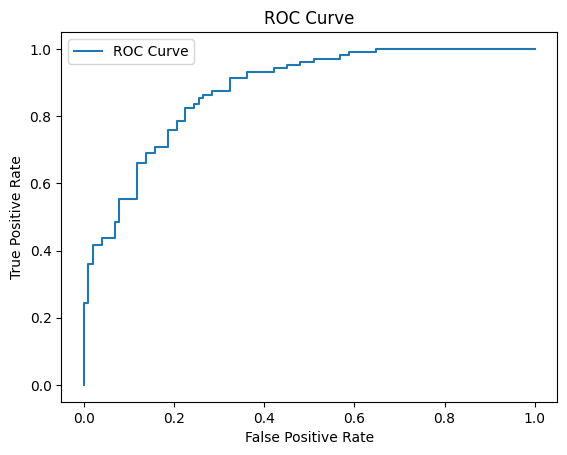

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
